In [1]:
import pandas as pd
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [2]:
from eda.eda import correlation
from eda.visualization import *
import eda

ModuleNotFoundError: No module named 'eda'

In [ ]:
import pydoop.hdfs as hd


# **1. Load data**

In [ ]:
spark = SparkSession.builder.master("spark://node-master:7077").appName("Employee_Attrition").getOrCreate()

data_path = 'hdfs://node-master:8020/user/hadoop/WA_Fn-UseC_-HR-Employee-Attrition.csv'
schema_fields = []

with hd.open(data_path) as f:
    data =  pd.read_csv(f)

In [7]:
for col_index in range(data.shape[1]):
  field_name = data.columns[col_index]
  field_type = data.dtypes[col_index]

  if field_type == 'int64':
    schema_fields.append(
        StructField(field_name, FloatType(), nullable = True)
    )
  elif field_type == 'object':
        schema_fields.append(
        StructField(field_name, StringType(), nullable = True)
    )

df = spark.read.csv(path=data_path, schema= StructType(schema_fields)).cache()

2023-02-06 10:11:09,734 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


23/02/06 10:11:12 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [8]:
df = spark.read.csv(path=data_path, schema= StructType(schema_fields)).cache()
df = df.where(df.EmployeeNumber.isNotNull())

df = df.where(df.EmployeeNumber.isNotNull())
df.show()

23/02/06 10:11:35 WARN CacheManager: Asked to cache already cached data.


+----+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
| Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBala

In [9]:
discrete_attributes = ["NumCompaniesWorked", "TrainingTimesLastYear", ]
continous_attributes = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", 
                        "MonthlyRate", "PercentSalaryHike", "TotalWorkingYears",
                        "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
categorical_attributes = ["Department", "EducationField", 
                          "Gender", "JobRole", "MaritalStatus"]
ordinal_attributes = ["BusinessTravel", "Education", "EnvironmentSatisfaction", "JobInvolvement", 
                      "JobLevel", "JobSatisfaction", "PerformanceRating",  "OverTime", 
                      "RelationshipSatisfaction", "StockOptionLevel",
                      "WorkLifeBalance"]
numeric_attributes = discrete_attributes + continous_attributes

target_name = "Attrition"

#**2 Explanatory Data Analysis**

##**2.1 Correlation**

Spearman correlation heatmap of numeric and ordrinal variables.

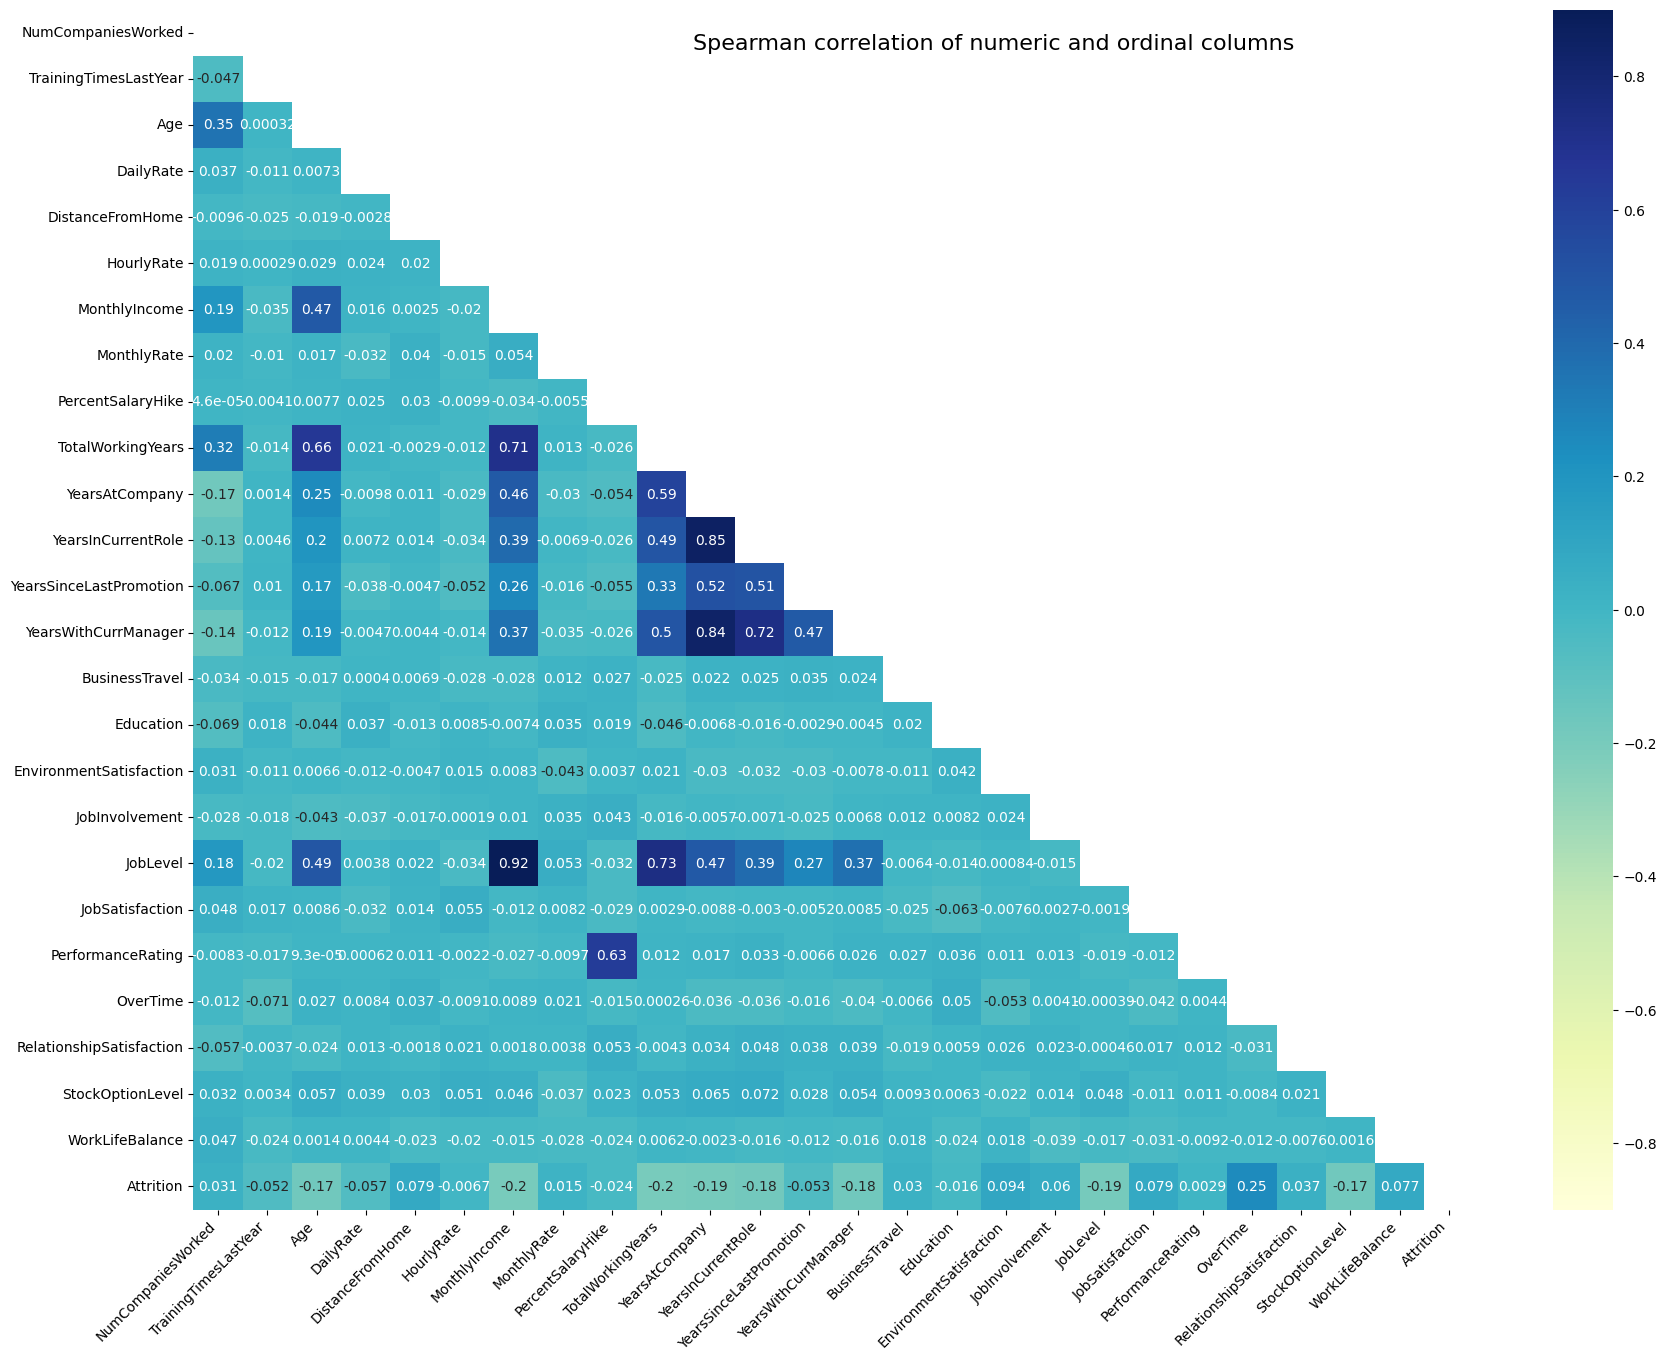

In [10]:
fig = correlation_heatmap(df, ordinal_attributes, numeric_attributes)
fig.suptitle("Spearman correlation of numeric and ordinal columns", size= 16)
plt.show()

##**2.2 Numeric variables**

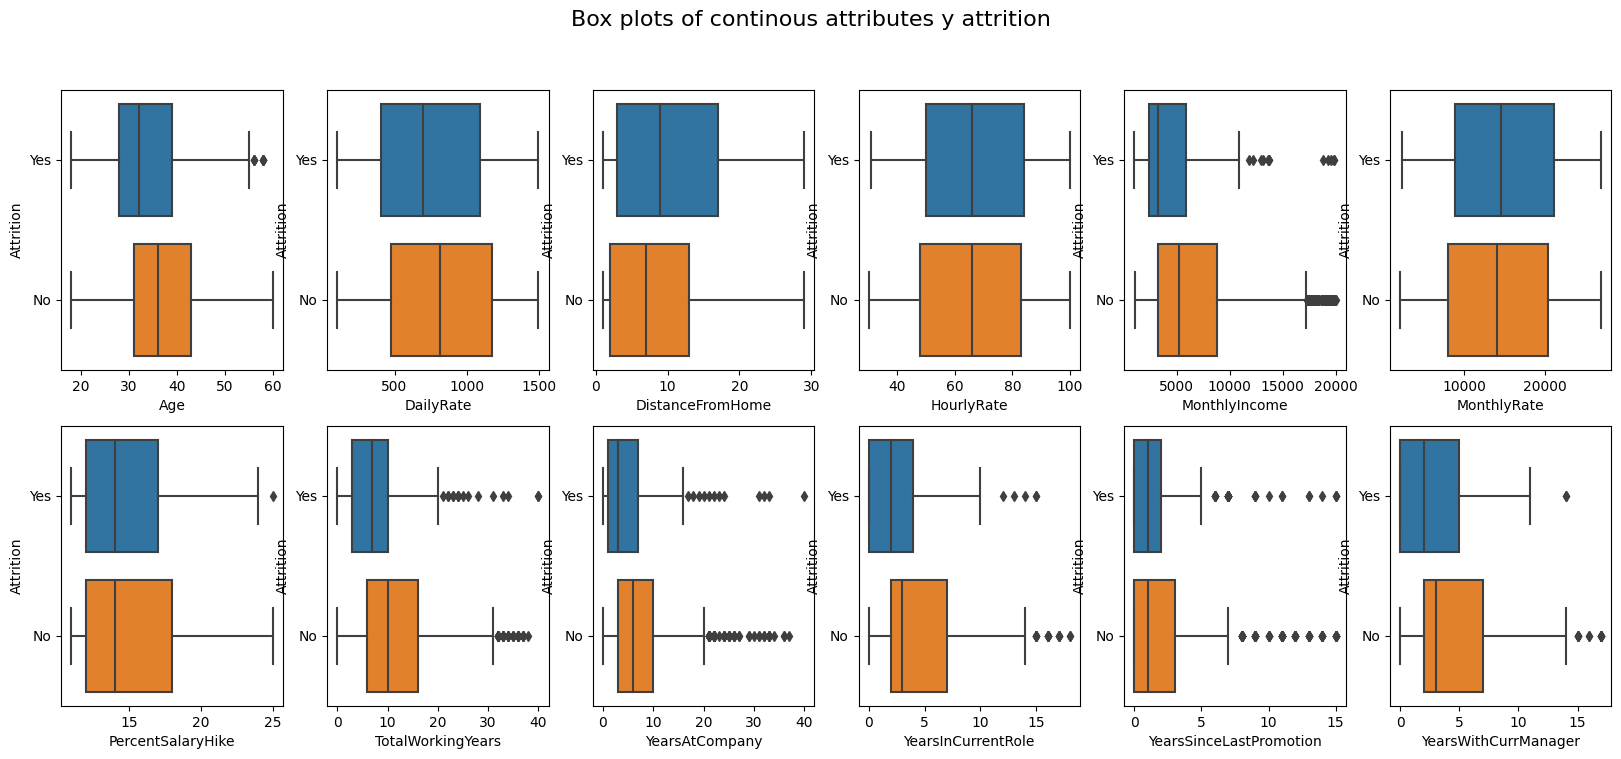

In [11]:
fig = continous_plot(dataset= df, continous_attributes= continous_attributes, plot_type= 'boxplot')
fig.suptitle("Box plots of continous attributes y attrition", size= 16)

plt.show()

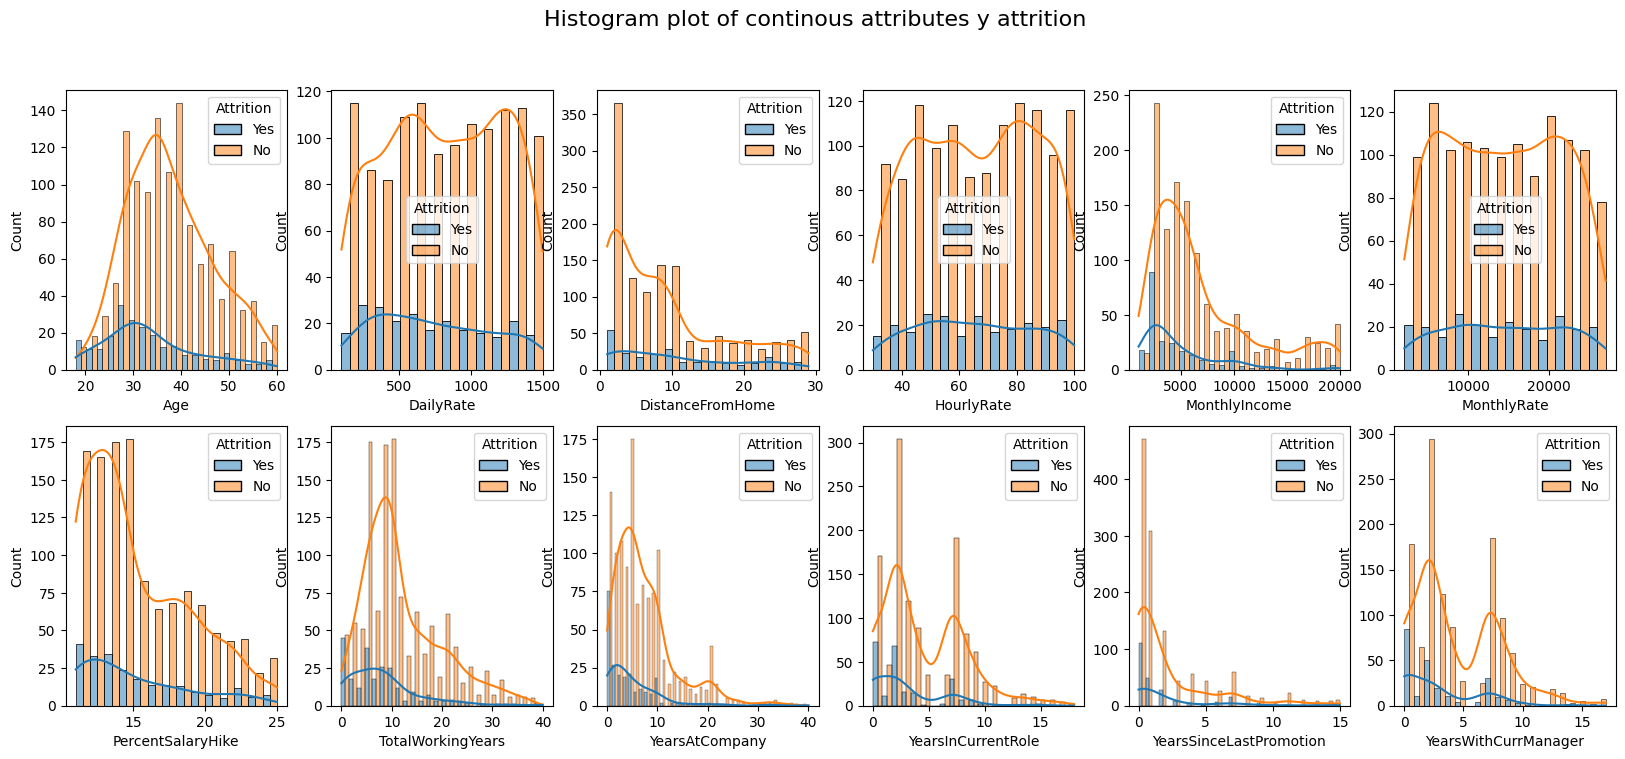

In [12]:
fig = continous_plot(dataset= df, continous_attributes= continous_attributes, plot_type= 'histplot')
fig.suptitle("Histogram plot of continous attributes y attrition", size= 16)

plt.show()

## **2.3 Ordinal variables**

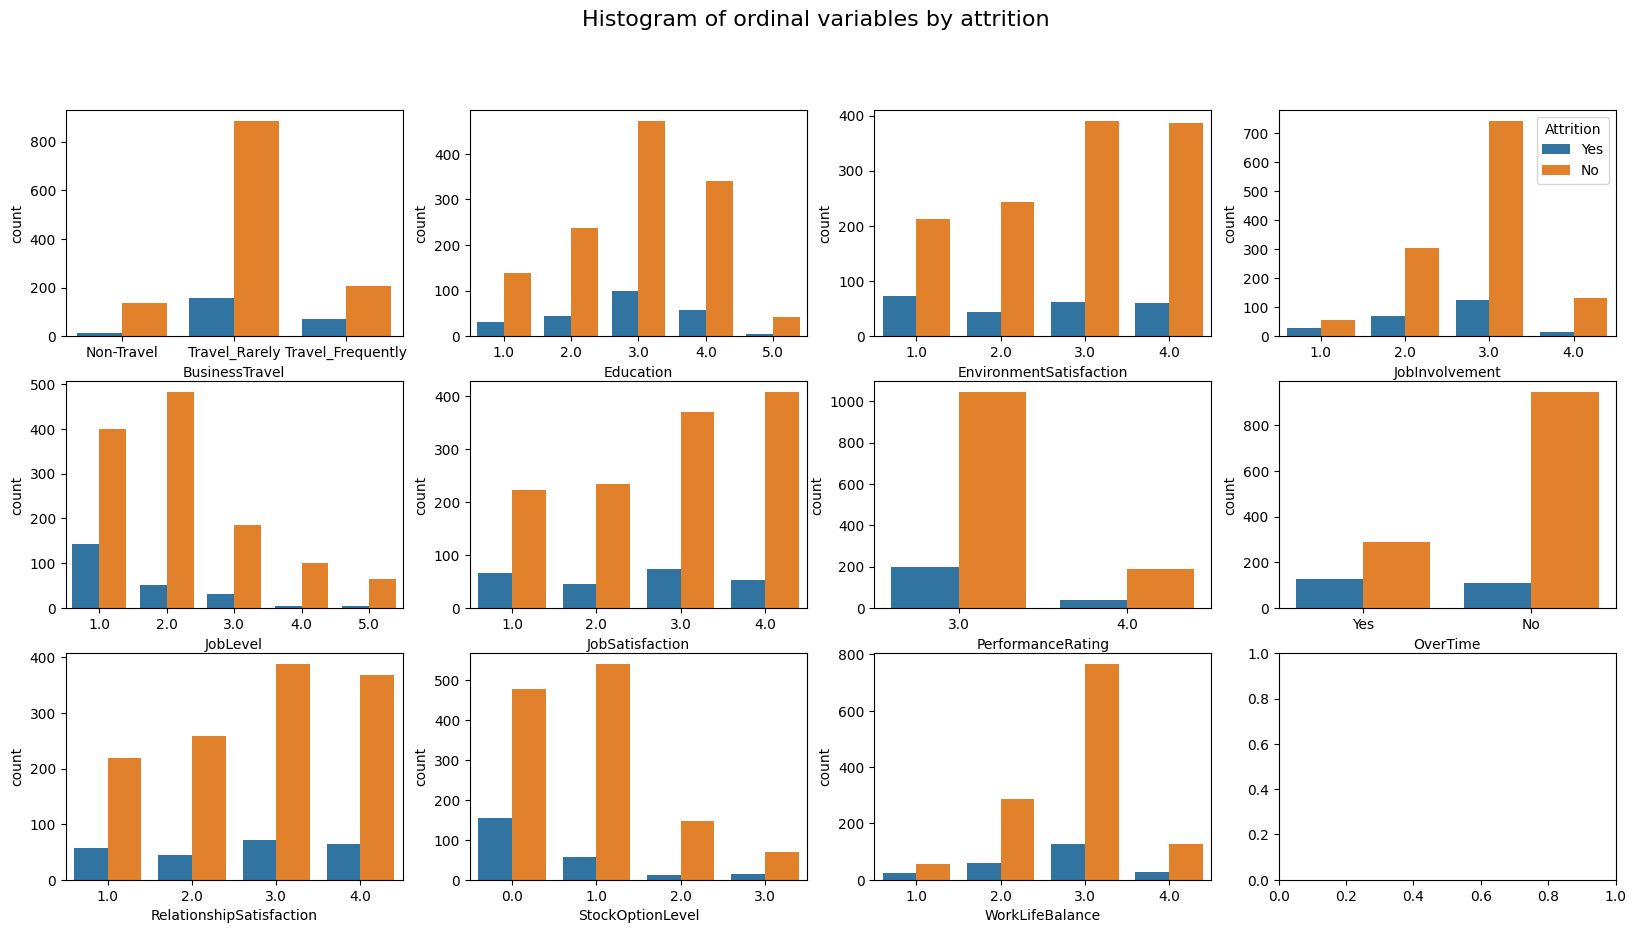

In [20]:
fig = hist_ordinal(df, ordinal_attributes)
plt.show()

##**2.4 Categorical variables**

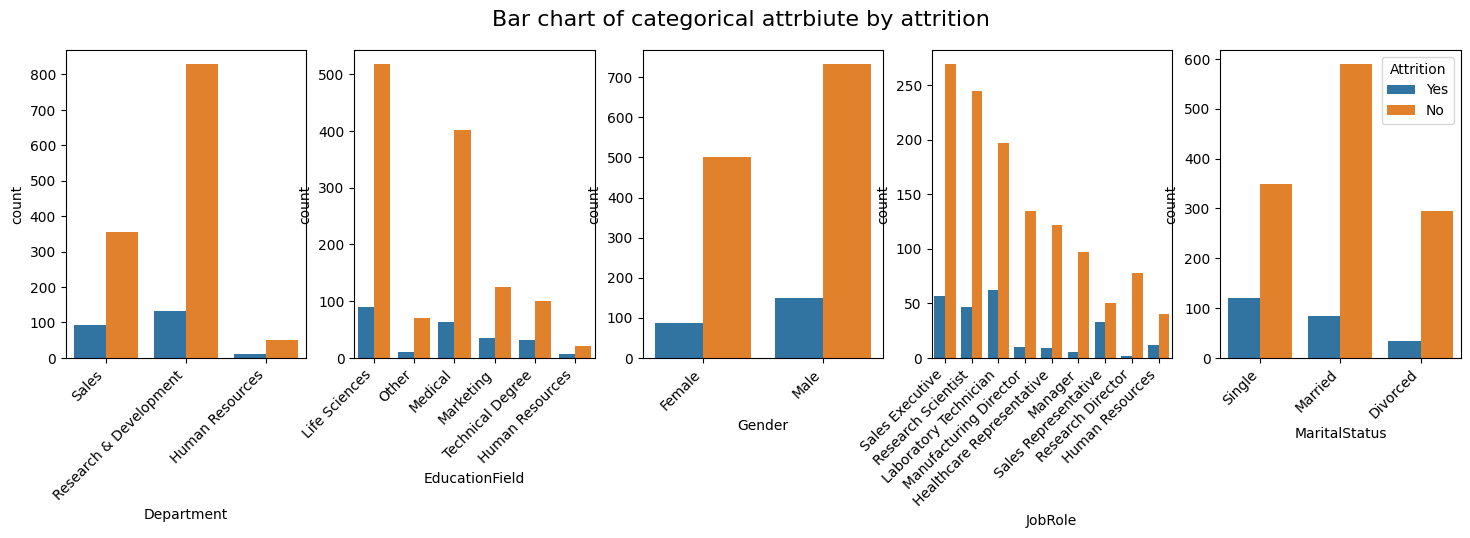

In [21]:
fig = categorical_plot(df, categorical_attributes, plot_type = 'countplot')
fig.suptitle("Bar chart of categorical attrbiute by attrition", size = 16)

plt.show()

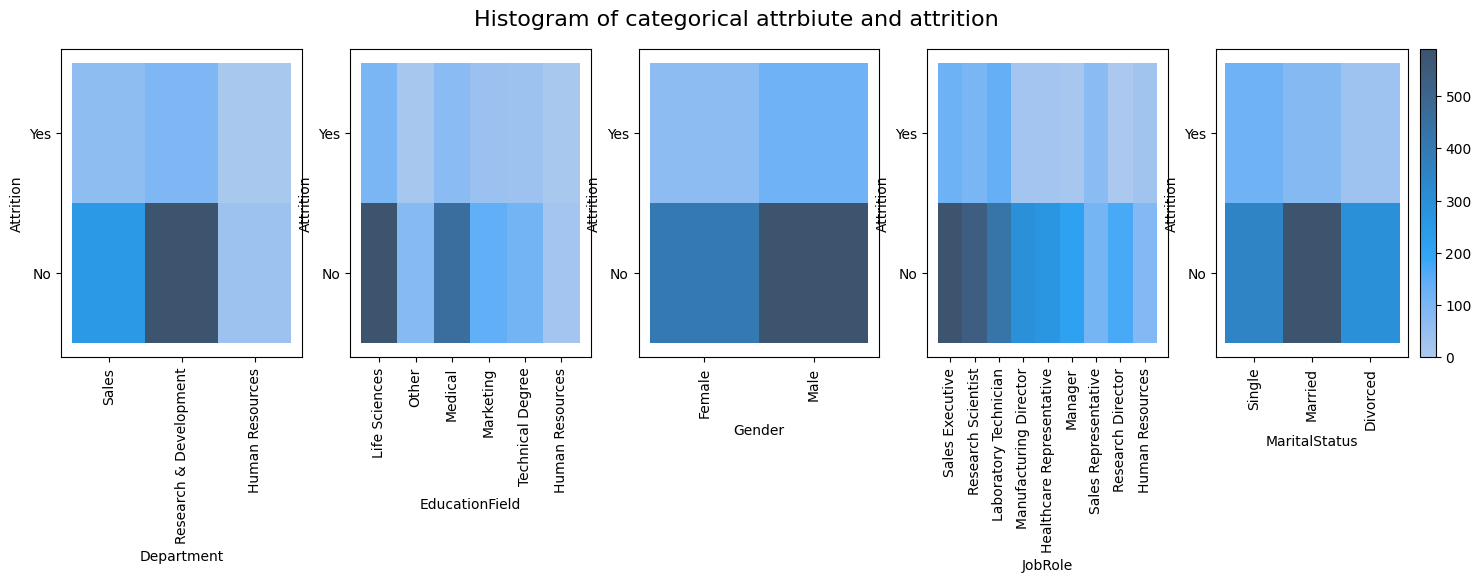

23/02/06 10:20:10 ERROR StandaloneSchedulerBackend: Application has been killed. Reason: Master removed our application: KILLED
23/02/06 10:20:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exiting due to error from cluster scheduler: Master removed our application: KILLED
	at org.apache.spark.errors.SparkCoreErrors$.clusterSchedulerError(SparkCoreErrors.scala:218)
	at org.apache.spark.scheduler.TaskSchedulerImpl.error(TaskSchedulerImpl.scala:923)
	at org.apache.spark.scheduler.cluster.StandaloneSchedulerBackend.dead(StandaloneSchedulerBackend.scala:154)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint.markDead(StandaloneAppClient.scala:262)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint$$anonfun$receive$1.applyOrElse(StandaloneAppClient.scala:169)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:115)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.proce

In [22]:
fig = categorical_plot(df, categorical_attributes, plot_type = 'histplot')
fig.suptitle("Histogram of categorical attrbiute and attrition", size = 16)

plt.show()